# Nigel lecture: smart city



# Rob session：
dicision trees : 根据entropy or Gini 决定tree nodes
ensemble methods,
hypter-

# 1.Load and review data-set 

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

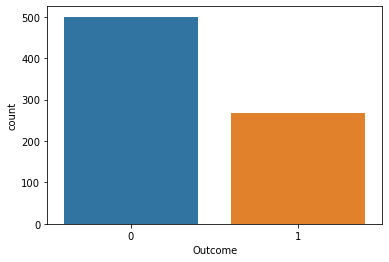

In [4]:
sns.countplot(x = "Outcome", data = df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

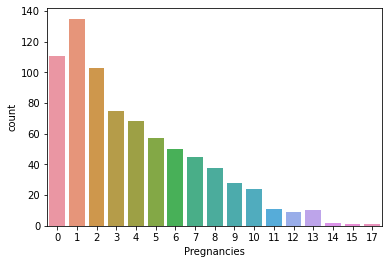

In [5]:
sns.countplot(x= "Pregnancies" , data = df)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age' ]] = df[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age' ]].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

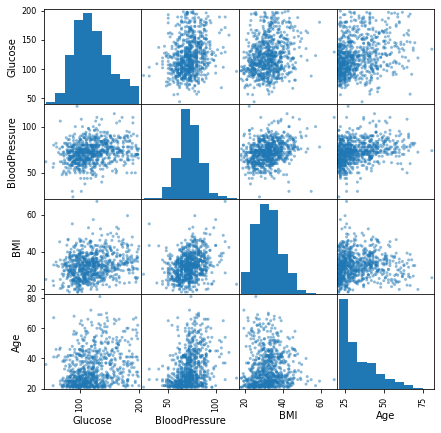

In [9]:
scatter_matrix(df[['Glucose', 'BloodPressure', 'BMI', 'Age']], figsize=(7,7));

(9.5, -0.5)

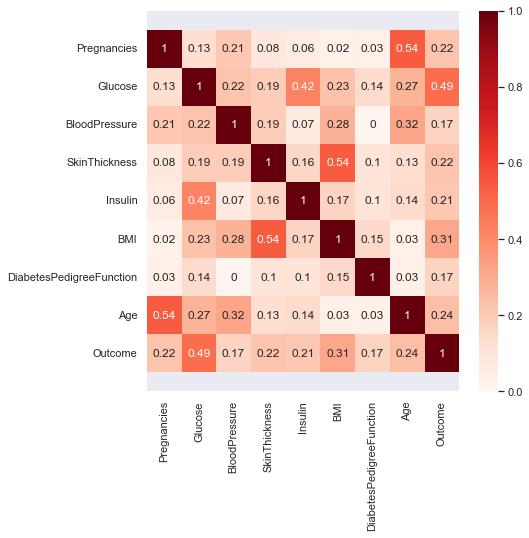

In [10]:
correlation_matrix = np.absolute(df.corr().round(2))
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.heatmap(correlation_matrix, annot = True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 2.Building the model

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [12]:
x = df.loc[:,'Pregnancies': 'Age']
y = df['Outcome']

In [13]:
from graphviz import Source

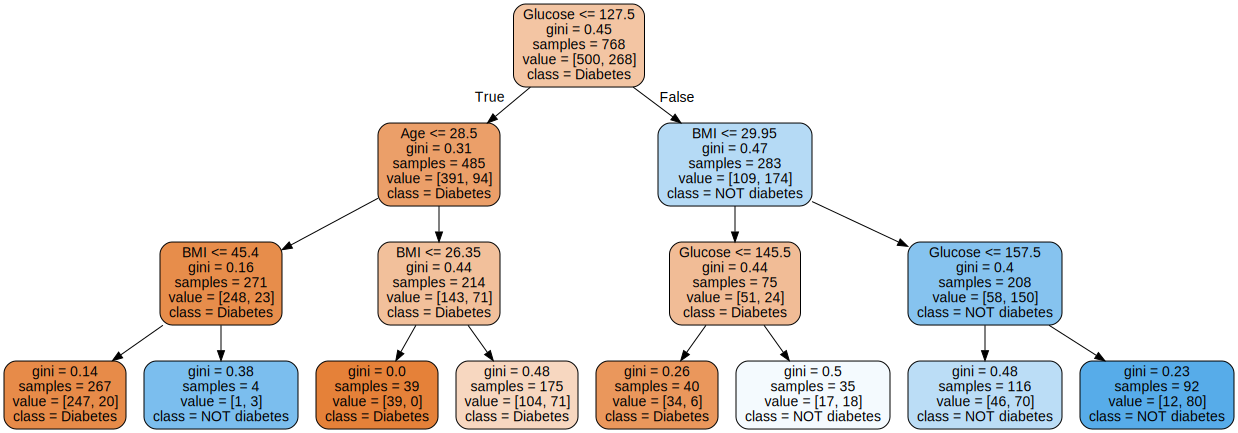

In [14]:
model = DecisionTreeClassifier(random_state=0, max_depth=3)
model.fit(x,y)
Source(export_graphviz(model,
               out_file = None,
               feature_names= x.columns,
               class_names=['Diabetes', 'NOT diabetes'],
               rounded=True, 
               proportion= False,
               precision = 2, filled=True))

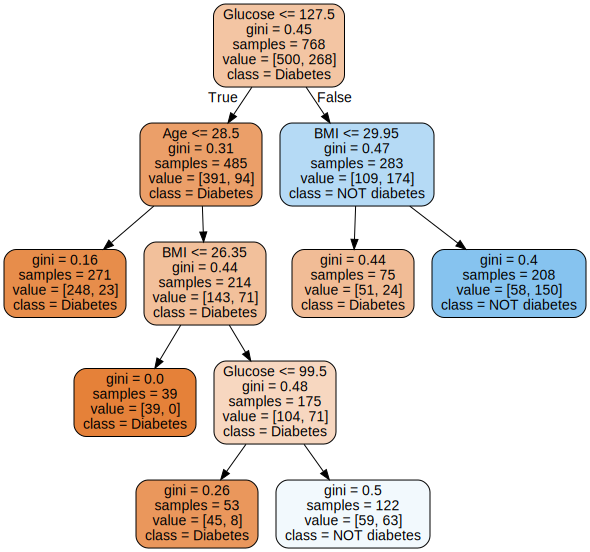

In [15]:
model = DecisionTreeClassifier(random_state=0, max_depth=6,ccp_alpha=0.01)
model.fit(x,y)
Source(export_graphviz(model,
               out_file = None,
               feature_names= x.columns,
               class_names=['Diabetes', 'NOT diabetes'],
               rounded=True, 
               proportion= False,
               precision = 2, filled=True))  

# 3. Randon forest classifier 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.8181818181818182

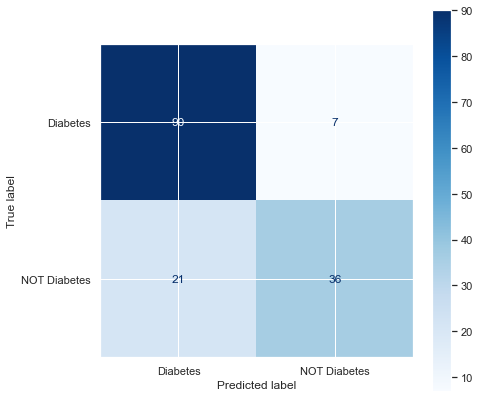

In [18]:
plot_confusion_matrix(rfc,x_test,y_test,display_labels=['Diabetes', 'NOT Diabetes'], cmap= plt.cm.Blues,)
plt.show()

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)


0.7142857142857143

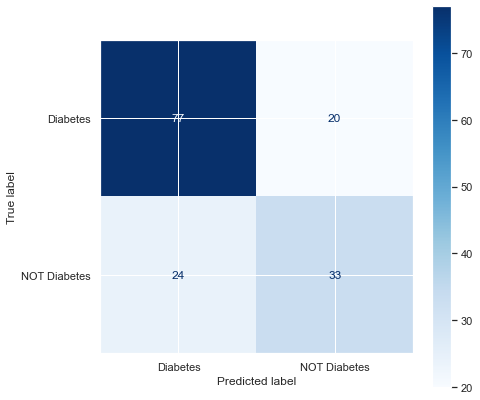

In [20]:
plot_confusion_matrix(dtc,x_test,y_test,display_labels=['Diabetes', 'NOT Diabetes'], cmap= plt.cm.Blues,)
plt.show()

# 4. Hyper-parameter Tuning 

In [21]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Automated search of optimum hyper-parameters 

In [22]:
param_grid = [
{'ccp_alpha': [0.0, 0.005, 0.007, 0.01,0.015, 0.02, 0.03, 0.05, 0.1],
 'criterion': ['gini', 'entrophy'],
 'max_depth': [2,3,4,5,6,7,8,9],
 'max_leaf_nodes': [2,3,4,5,6,7,8,9]}
    ]

In [ ]:
clf = GridSearchCV(estimator=rfc, param_grid=param_grid)
best_model = clf.fit(x_train, y_train)